In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import seaborn as sns
from datetime import datetime
import yfinance as yf
yf.pdr_override()

In [85]:
# Lista de tickers
tickers = ["PETR4.SA", 'VALE3.SA', 'ITUB4.SA', 'BBAS3.SA', 'BBDC3.SA']

# Baixando os dados dos tickers
carteira = yf.download(tickers, start="2002-01-01", end="2023-12-31")['Adj Close']

# Baixando os dados do índice Ibovespa
ibov = yf.download('^BVSP', start="2002-01-01", end="2023-12-31")['Adj Close']

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [86]:
#50k dividido em 6
carteira_normalizada = (carteira / carteira.iloc[0])*8333.33
ibov_normalizado = (ibov / ibov.iloc[0])*50000

In [87]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

Date
2002-01-02     50000.000000
2002-01-03     51416.522491
2002-01-04     51658.016148
2002-01-07     51827.422145
2002-01-08     51066.897347
                  ...      
2023-12-21    476434.544406
2023-12-22    478492.647059
2023-12-26    481304.065744
2023-12-27    483686.562860
2023-12-28    483654.123414
Name: Adj Close, Length: 5447, dtype: float64

In [88]:
resultados_direcionais = pd.read_json(r'C:\Users\cptfr\Desktop\TCC_B3_OPCOES\estrategias\resultados_direcionais.json')
print(resultados_direcionais)

    Data_Entrada  Data_Vencimento  Tipo     Ativo  ResultadosTotais
0       20031120         20040119  CALL  BBDC3.SA                 1
1       20040105         20040216  CALL  PETR4.SA                 1
2       20060911         20061016   PUT  PETR4.SA                 1
3       20071108         20071217  CALL  PETR4.SA                 0
4       20080818         20081020   PUT  BBDC3.SA                 1
5       20100204         20100315   PUT  PETR4.SA                 0
6       20100617         20100719  CALL  BBDC3.SA                 1
7       20110817         20111017   PUT  PETR4.SA                 0
8       20110804         20110919   PUT  VALE3.SA                 0
9       20110802         20110919   PUT  ITUB4.SA                 1
10      20120425         20120618   PUT  ITUB4.SA                 0
11      20120404         20120521   PUT  BBAS3.SA                 1
12      20140327         20140519  CALL  BBDC3.SA                 1
13      20160303         20160418  CALL  PETR4.S

In [89]:
carteira_opcoes = pd.DataFrame(index = carteira_normalizada.index,columns=['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBAS3.SA', 'BBDC3.SA','saldo'])
colunas_modificar = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBAS3.SA', 'BBDC3.SA']
carteira_opcoes.loc[carteira_opcoes.index[0], colunas_modificar] = 1666.66
carteira_opcoes['saldo']= carteira_opcoes.sum(axis=1)
carteira_opcoes.index = carteira_opcoes.index.strftime("%Y%m%d")
carteira_opcoes.index = carteira_opcoes.index.astype(int)
carteira_opcoes.reset_index(inplace=True)
carteira_opcoes
                    

,Date,PETR4.SA,VALE3.SA,ITUB4.SA,BBAS3.SA,BBDC3.SA,saldo
0,20020101,1666.66,1666.66,1666.66,1666.66,1666.66,8333.3
1,20020102,NaN,NaN,NaN,NaN,NaN,0.0
2,20020103,NaN,NaN,NaN,NaN,NaN,0.0
3,20020104,NaN,NaN,NaN,NaN,NaN,0.0
4,20020107,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...
5500,20231221,NaN,NaN,NaN,NaN,NaN,0.0
5501,20231222,NaN,NaN,NaN,NaN,NaN,0.0
5502,20231226,NaN,NaN,NaN,NaN,NaN,0.0
5503,20231227,NaN,NaN,NaN,NaN,NaN,0.0


In [90]:
for dia in carteira_opcoes['Date']:
    #print(dia)
    if dia in resultados_direcionais['Data_Vencimento'].values:
        print(dia)
        posicao = carteira_opcoes.query('Date == @dia')
        posicao = int(posicao.index[0])
        ativo = resultados_direcionais.loc[resultados_direcionais['Data_Vencimento'] == dia, 'Ativo']
        # AQUI TA O BO
        print("ATIVOS NESTA DATA: \n {}".format(ativo))
        for ativos in ativo:
            print(ativos)
            #ativo = resultados_direcionais.loc[resultados_direcionais['Data_Vencimento'] == dia, 'Ativo'].iloc[0]
            resultado = resultados_direcionais.loc[(resultados_direcionais['Data_Vencimento'] == dia) & (resultados_direcionais['Ativo'] == ativos), 'ResultadosTotais'].iloc[0]
            posicao_anterior = posicao - 1
            #print(ativos, resultado)
            for coluna in carteira_opcoes.columns:
                print(coluna)
                if coluna == ativos:
                    print("Resultado {}".format(resultado))
                    if resultado == 1:
                        print("Aumentando")
                        carteira_opcoes.loc[posicao, ativos] = carteira_opcoes.loc[posicao_anterior, ativos] * 1.3
                        #carteira_opcoes.loc[posicao, 'saldo'] = carteira_opcoes.loc[posicao, ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBAS3.SA', 'BBDC3.SA']].sum()
                    if resultado == 0:
                        print("Diminuindo")
                        carteira_opcoes.loc[posicao, ativos] = carteira_opcoes.loc[posicao_anterior, ativos] * 0.7
                        #carteira_opcoes.loc[posicao, 'saldo'] = carteira_opcoes.loc[posicao, ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBAS3.SA', 'BBDC3.SA']].sum()
                elif coluna not in ativo.values:
                    if coluna != 'Date' and coluna != 'saldo':
                        print('Alterando {}'.format(coluna))
                        carteira_opcoes.loc[posicao, coluna] = carteira_opcoes.loc[posicao_anterior, coluna]
            carteira_opcoes.loc[posicao, 'saldo'] = carteira_opcoes.loc[posicao, ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBAS3.SA', 'BBDC3.SA']].sum()
    elif dia!= carteira_opcoes['Date'].loc[0]:
        posicao = carteira_opcoes.query('Date == @dia')
        posicao = int(posicao.index[0])
        #print(posicao)
        #print(carteira_opcoes.loc[posicao])
        posicao_anterior = posicao - 1
        # Lista de colunas a serem modificadas
        colunas_mod = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBAS3.SA', 'BBDC3.SA', 'saldo']
        # Usando .loc para acessar a linha e colunas_mod específicas e definir os valores de uma vez
        carteira_opcoes.loc[posicao, colunas_mod] = carteira_opcoes.loc[posicao_anterior, colunas_mod]

20040119
ATIVOS NESTA DATA: 
 0    BBDC3.SA
Name: Ativo, dtype: object
BBDC3.SA
Date
PETR4.SA
Alterando PETR4.SA
VALE3.SA
Alterando VALE3.SA
ITUB4.SA
Alterando ITUB4.SA
BBAS3.SA
Alterando BBAS3.SA
BBDC3.SA
Resultado 1
Aumentando
saldo
20040216
ATIVOS NESTA DATA: 
 1    PETR4.SA
Name: Ativo, dtype: object
PETR4.SA
Date
PETR4.SA
Resultado 1
Aumentando
VALE3.SA
Alterando VALE3.SA
ITUB4.SA
Alterando ITUB4.SA
BBAS3.SA
Alterando BBAS3.SA
BBDC3.SA
Alterando BBDC3.SA
saldo
20061016
ATIVOS NESTA DATA: 
 2    PETR4.SA
Name: Ativo, dtype: object
PETR4.SA
Date
PETR4.SA
Resultado 1
Aumentando
VALE3.SA
Alterando VALE3.SA
ITUB4.SA
Alterando ITUB4.SA
BBAS3.SA
Alterando BBAS3.SA
BBDC3.SA
Alterando BBDC3.SA
saldo
20071217
ATIVOS NESTA DATA: 
 3    PETR4.SA
Name: Ativo, dtype: object
PETR4.SA
Date
PETR4.SA
Resultado 0
Diminuindo
VALE3.SA
Alterando VALE3.SA
ITUB4.SA
Alterando ITUB4.SA
BBAS3.SA
Alterando BBAS3.SA
BBDC3.SA
Alterando BBDC3.SA
saldo
20081020
ATIVOS NESTA DATA: 
 4    BBDC3.SA
Name: Ativo, dty

In [92]:
carteira_opcoes.set_index('Date', inplace=True)
carteira_opcoes.index = pd.to_datetime(carteira_opcoes.index, format='%Y%m%d')
carteira_opcoes['saldo']


Date
2002-01-01    8333.300000
2002-01-02    8333.300000
2002-01-03    8333.300000
2002-01-04    8333.300000
2002-01-07    8333.300000
                 ...     
2023-12-21    6010.673531
2023-12-22    6010.673531
2023-12-26    6010.673531
2023-12-27    6010.673531
2023-12-28    6010.673531
Name: saldo, Length: 5505, dtype: float64

In [93]:
carteira_normalizada['saldo_op'] = carteira_opcoes['saldo']
carteira_normalizada['saldo']= carteira_normalizada.sum(axis=1)
carteira_normalizada

,BBAS3.SA,BBDC3.SA,ITUB4.SA,PETR4.SA,VALE3.SA,saldo_op,saldo
Date,,,,,,,
2002-01-01,8333.330000,8333.330000,8333.330000,8333.330000,8333.330000,8333.300000,4.999995e+04
2002-01-02,8482.838778,8333.330000,8712.602039,8349.621006,8173.078489,8333.300000,5.038477e+04
2002-01-03,8616.614444,8396.780747,8617.436001,8406.642056,8301.281897,8333.300000,5.067206e+04
2002-01-04,8419.887515,8365.054406,8475.854919,8354.508814,8477.563483,8333.300000,5.042617e+04
2002-01-07,8231.029024,8396.780747,8381.616752,8536.977690,8477.563483,8333.300000,5.035727e+04
...,...,...,...,...,...,...,...
2023-12-21,838219.499083,121035.544656,161975.011467,179925.946834,323694.649235,6010.673531,1.630861e+06
2023-12-22,840535.340898,121336.387180,164543.682686,181656.487306,321255.471708,6010.673531,1.635338e+06
2023-12-26,848255.215004,121820.117380,166223.199239,184573.683525,322390.974597,6010.673531,1.649274e+06


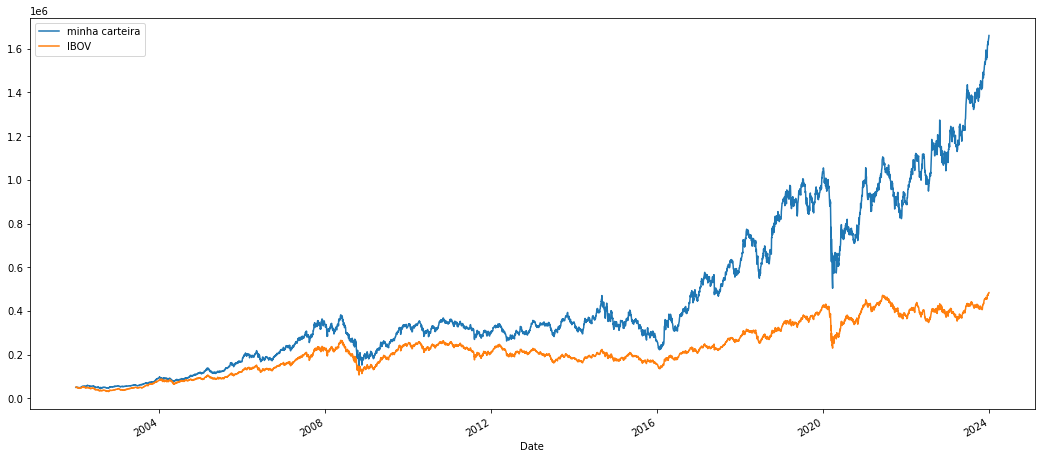

In [96]:
carteira_normalizada["saldo"].plot(figsize=(18,8), label='minha carteira')
ibov_normalizado.plot(label="IBOV")
plt.legend()

<AxesSubplot:xlabel='Date'>

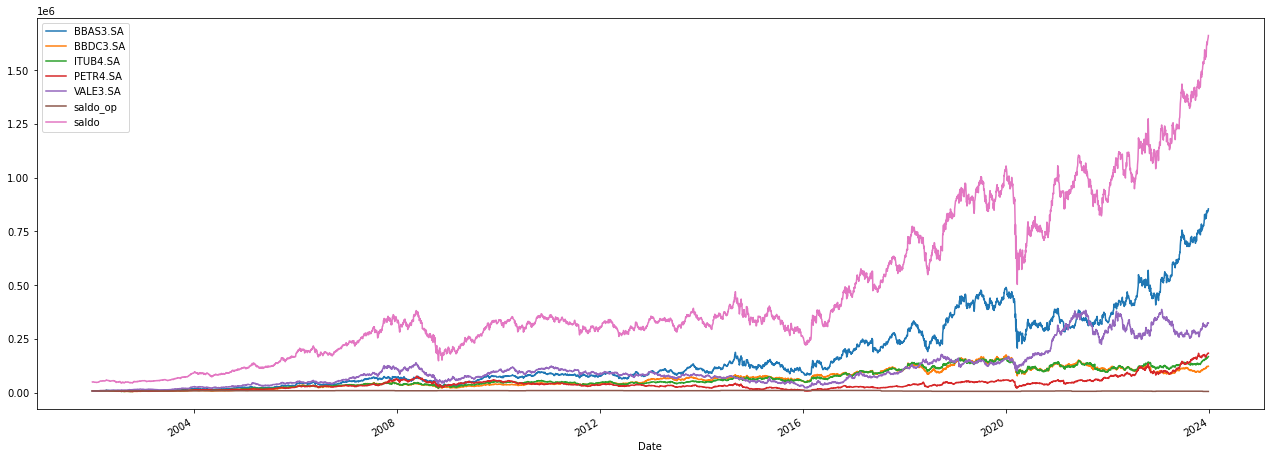

In [97]:
carteira_normalizada.plot(figsize=(22,8))